[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1yqqttEM1XfvkD9LSY8LIgic6r5fOVBaf)


**NOTA:** Este notebook no esta preparado para funcionar de acuerdo al requirements del repositorio, solo funciona en Google Colab.

In [ ]:
pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.2 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=04e7f0cd52e37a476042b0db0aafad63f3446c0cc6b85e3adab006b5866577f2
  Stored in directory: /root/.cache/pip/wheels/7c/96/04/4f5f31ff812f684f69f40cb1634357812220aac58d4698048c
Successfully built iopath
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-gr23i8gq/detectron2_33b8

In [ ]:
from PIL import Image
if not hasattr(Image, "LINEAR"):
    Image.LINEAR = Image.Resampling.BILINEAR


In [ ]:
from layoutparser.models import Detectron2LayoutModel


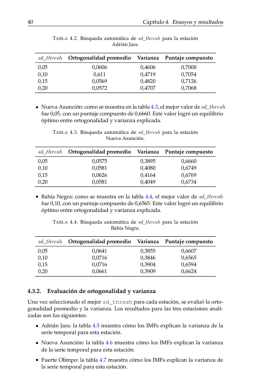

In [ ]:
import cv2
from matplotlib import pyplot as plt

imagen = cv2.imread("PruebaNougat2.png")
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

plt.imshow(imagen_rgb)
plt.axis("off")
plt.show()

# Modelo

In [ ]:
model_2 = Detectron2LayoutModel(
    'lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
    extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.7],
    label_map={0: "text", 1: "title", 2: "list", 3:"table", 4:"figure"}
)

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:
import layoutparser as lp
layout_2 = model_2.detect(imagen)

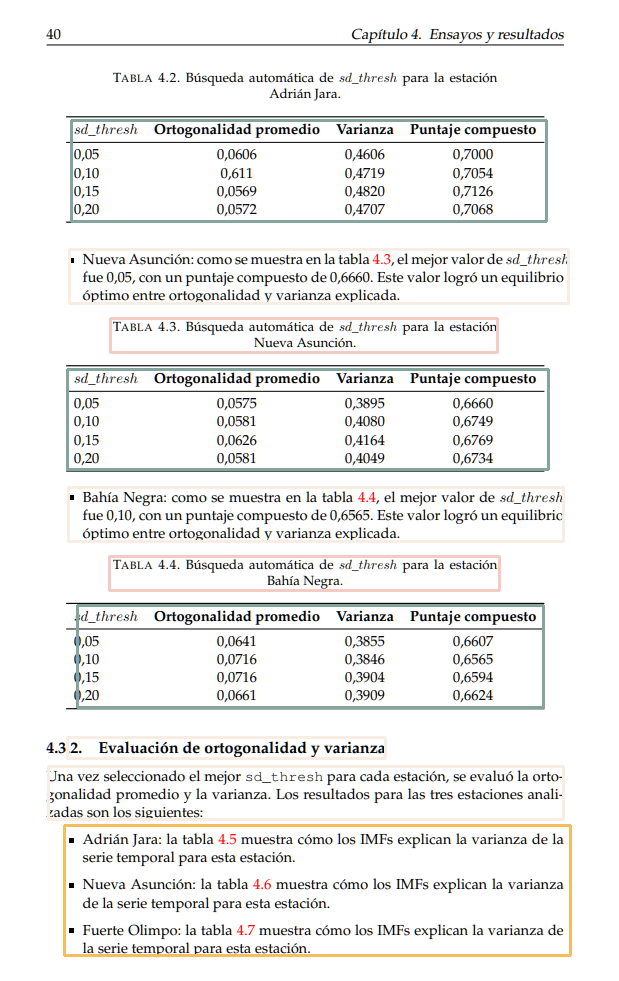

In [ ]:
lp.draw_box(imagen, layout_2, box_width=3)

In [ ]:
layout_2

Layout(_blocks=[TextBlock(block=Rectangle(x_1=67.94710540771484, y_1=737.9111328125, x_2=385.5414733886719, y_2=758.3785400390625), text=None, id=None, type=title, parent=None, next=None, score=0.9973080158233643), TextBlock(block=Rectangle(x_1=68.57803344726562, y_1=487.6554870605469, x_2=563.9899291992188, y_2=541.8601684570312), text=None, id=None, type=title, parent=None, next=None, score=0.9580290913581848), TextBlock(block=Rectangle(x_1=109.41300201416016, y_1=556.97802734375, x_2=499.5763854980469, y_2=590.7993774414062), text=None, id=None, type=text, parent=None, next=None, score=0.9571120142936707), TextBlock(block=Rectangle(x_1=69.21426391601562, y_1=249.92233276367188, x_2=568.2703857421875, y_2=303.82818603515625), text=None, id=None, type=title, parent=None, next=None, score=0.9487705826759338), TextBlock(block=Rectangle(x_1=64.75749969482422, y_1=825.5870361328125, x_2=570.2360229492188, y_2=955.3972778320312), text=None, id=None, type=list, parent=None, next=None, score

In [ ]:
import os
from PIL import Image
import numpy as np
from layoutparser.elements import Layout
from typing import Union

def export_layout_blocks_as_crops(
    image: Union[Image.Image, np.ndarray],
    layout: Layout,
    output_dir: str = "recortes",
    prefix: str = "",
    overwrite: bool = True,
    padding: int = 5,
) -> None:
    """
    Recorta y guarda cada bloque detectado en una imagen, ordenado de arriba hacia abajo,
    expandiendo cada bounding box en `padding` píxeles.

    Args:
        image (PIL.Image or np.ndarray): Imagen original.
        layout (Layout): Layout con los bloques detectados.
        output_dir (str): Carpeta donde guardar los recortes.
        prefix (str): Prefijo opcional para los nombres de archivo.
        overwrite (bool): Si True, elimina los archivos anteriores en la carpeta.
        padding (int): Cantidad de píxeles para expandir el bbox en cada dirección.

    Returns:
        None
    """

    # Convertir imagen si es ndarray
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    # Obtener tamaño de la imagen
    img_w, img_h = image.size

    # Crear carpeta si no existe
    os.makedirs(output_dir, exist_ok=True)

    # Borrar archivos anteriores si se desea
    if overwrite:
        for f in os.listdir(output_dir):
            os.remove(os.path.join(output_dir, f))

    # Ordenar bloques de arriba hacia abajo
    sorted_blocks = sorted(layout, key=lambda b: b.block.y_1)

    for idx, block in enumerate(sorted_blocks, start=1):
        # Obtener coordenadas
        x1, y1, x2, y2 = block.block.points[0][0], block.block.points[0][1], block.block.points[2][0], block.block.points[2][1]

        # Aplicar padding y limitar al tamaño de la imagen
        x1 = max(int(x1) - padding, 0)
        y1 = max(int(y1) - padding, 0)
        x2 = min(int(x2) + padding, img_w)
        y2 = min(int(y2) + padding, img_h)

        # Recortar
        cropped = image.crop((x1, y1, x2, y2))

        # Nombre del archivo
        block_type = block.type.lower() if block.type else "unknown"
        filename = f"{prefix}{idx:02d}_{block_type}.png"
        save_path = os.path.join(output_dir, filename)

        # Guardar
        cropped.save(save_path)

        # Log
        print(f"✔ Guardado: {filename}  | tipo: {block_type} | bbox: ({x1}, {y1}, {x2}, {y2})")

    print(f"\n✅ Se exportaron {len(sorted_blocks)} recortes a la carpeta '{output_dir}/'.")


In [ ]:
export_layout_blocks_as_crops(
    image=imagen,
    layout=layout_2,
    output_dir="recortes",
    padding=5  # ← expansión del bbox
)


✔ Guardado: 01_table.png  | tipo: table | bbox: (66, 115, 551, 226)
✔ Guardado: 02_title.png  | tipo: title | bbox: (64, 244, 573, 308)
✔ Guardado: 03_text.png  | tipo: text | bbox: (105, 313, 502, 357)
✔ Guardado: 04_table.png  | tipo: table | bbox: (62, 364, 553, 474)
✔ Guardado: 05_title.png  | tipo: title | bbox: (63, 482, 568, 546)
✔ Guardado: 06_text.png  | tipo: text | bbox: (104, 551, 504, 595)
✔ Guardado: 07_table.png  | tipo: table | bbox: (72, 600, 548, 712)
✔ Guardado: 08_title.png  | tipo: title | bbox: (62, 732, 390, 763)
✔ Guardado: 09_title.png  | tipo: title | bbox: (43, 761, 568, 824)
✔ Guardado: 10_list.png  | tipo: list | bbox: (59, 820, 575, 960)

✅ Se exportaron 10 recortes a la carpeta 'recortes/'.


In [ ]:
from PIL import ImageDraw, ImageFont

def draw_layout_annotations(
    image: Union[Image.Image, np.ndarray],
    layout: Layout,
    font_size: int = 16,
    box_color: str = "red",
    text_color: str = "white",
    fill_color: str = "black",
    font_path: str = None
) -> Image.Image:
    """
    Dibuja bounding boxes y etiquetas de tipo sobre una copia de la imagen original.
    """

    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    annotated_img = image.copy()
    draw = ImageDraw.Draw(annotated_img)

    try:
        font = ImageFont.truetype(font_path, font_size) if font_path else ImageFont.load_default()
    except:
        font = ImageFont.load_default()

    for block in layout:
        x1, y1 = int(block.block.x_1), int(block.block.y_1)
        x2, y2 = int(block.block.x_2), int(block.block.y_2)
        label = block.type or "unknown"

        # Dibujar rectángulo
        draw.rectangle([x1, y1, x2, y2], outline=box_color, width=2)

        # Calcular tamaño del texto (Pillow ≥ 10.0.0 compatible)
        bbox = font.getbbox(label)
        text_w = bbox[2] - bbox[0]
        text_h = bbox[3] - bbox[1]

        # Dibujar fondo y texto
        draw.rectangle([x1, y1 - text_h - 2, x1 + text_w + 4, y1], fill=fill_color)
        draw.text((x1 + 2, y1 - text_h - 1), label, fill=text_color, font=font)

    return annotated_img



In [ ]:
annotated = draw_layout_annotations(
    image=imagen,
    layout=layout_2,
    font_size=14
)

annotated.save("pagina_anotada.png")

In [ ]:
!pip freeze > requirements.txt
